# Session 2: Twoway

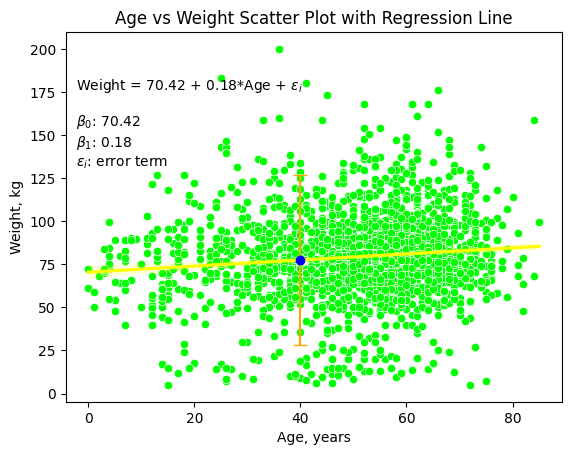

In [1]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import io

# Load the data from the URL using requests
url = 'https://raw.githubusercontent.com/jhustata/livre/main/transplants.txt'
response = requests.get(url)
content = response.content.decode('utf-8')
file = io.StringIO(content)
data = pd.read_csv(file, sep='\t')

# Extract the 'age' and 'don_wgt_kg' columns
age = data['age']
weight = data['don_wgt_kg']

# Run a simple linear regression to get the parameters
X = sm.add_constant(age)  # adding a constant (intercept term) to the model
model = sm.OLS(weight, X).fit()
beta0 = model.params[0]
beta1 = model.params[1]

# Compute the Root Mean Squared Error (RMSE)
y_true = weight
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate the predicted weight at age 40
age_40 = 40
weight_40 = beta0 + beta1 * age_40

# Calculate the upper and lower bounds of the error bar
error = 1.96 * rmse

# Create a figure and axis
fig, ax = plt.subplots()

# Generate a scatter plot
sns.scatterplot(x=age, y=weight, color='lime', ax=ax)

# Generate a regression line
sns.regplot(x=age, y=weight, scatter=False, color='yellow', ax=ax)

# Add the error bar
ax.errorbar(age_40, weight_40, yerr=error, fmt='o', color='orange', mec='blue', mfc='blue', label='Error Bar', capsize=5)

# Adding text for beta0, beta1, error term, and RMSE
formula = f'Weight = {beta0:.2f} + {beta1:.2f}*Age + $\\epsilon_i$'
params = f'$\\beta_0$: {beta0:.2f}\n$\\beta_1$: {beta1:.2f}\n$\\epsilon_i$: error term\n'
ax.text(0.02, 0.88, formula + '\n\n' + params + '\n\n', transform=ax.transAxes, verticalalignment='top')

# Styling
plt.title('Age vs Weight Scatter Plot with Regression Line')
plt.xlabel('Age, years')
plt.ylabel('Weight, kg')

# Save the figure
plt.savefig('age_weight_scatterplot.png')
plt.show()

Apologies for the confusion. Based on your preference for two-way relationships and regression with one predictor, here's an updated suggestion for Session 2 content focused on those topics:

Session 2: Two-Way Relationships and Regression with One Predictor

1. Review of Scatter Plots:
   - Recap of scatter plots from Session 1
   - Discussing the use of scatter plots for visualizing two-way relationships

2. Correlation Analysis:
   - Introduction to correlation analysis and its importance
   - Calculation and interpretation of correlation coefficients (Pearson, Spearman)
   - Using Stata to compute and visualize correlations between variables

3. Two-Way Scatter Plots:
   - Creating two-way scatter plots in Stata to explore relationships between two variables
   - Customizing scatter plots with labels, colors, and markers

4. Regression Analysis with One Predictor:
   - Overview of simple linear regression
   - Assumptions of linear regression
   - Performing simple linear regression using Stata
   - Interpreting the regression coefficients and R-squared

5. Visualizing Regression Lines:
   - Adding regression lines to scatter plots in Stata
   - Customizing regression lines with different colors and styles
   - Assessing the goodness of fit using scatter plots with regression lines

6. Prediction and Inference:
   - Predicting outcomes using regression models
   - Confidence intervals and hypothesis testing for regression coefficients
   - Using Stata to perform prediction and inference tasks

7. Model Diagnostics:
   - Assessing the assumptions of linear regression
   - Checking for linearity, homoscedasticity, and normality of residuals
   - Diagnostic plots in Stata: residual plots, QQ plots, leverage plots

8. Case Study and Practice:
   - Applying correlation analysis and regression with one predictor to a real-world dataset
   - Exploring relationships and making predictions based on the analysis
   - Interpreting the results and discussing the implications

Ensure that you provide ample opportunities for hands-on practice and encourage students to apply the concepts they learn to their own datasets or examples. Including exercises, mini-projects, or discussion questions related to the session's topics can further enhance student engagement and understanding.